In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("delivery_time.csv")
df.head(4)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9


In [3]:
#1) Delivery_time -> Predict delivery time using sorting time

In [4]:
#Data Discription



df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


#EDA

In [5]:
df.shape

(21, 2)

In [6]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [8]:
df.columns=('Delivery_time','Sorting_time')
df

,Delivery_time,Sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [9]:
plt.rcParams['figure.dpi']=300
plt.rcParams['figure.figsize']=(10,5)

<AxesSubplot:xlabel='Delivery_time', ylabel='Density'>

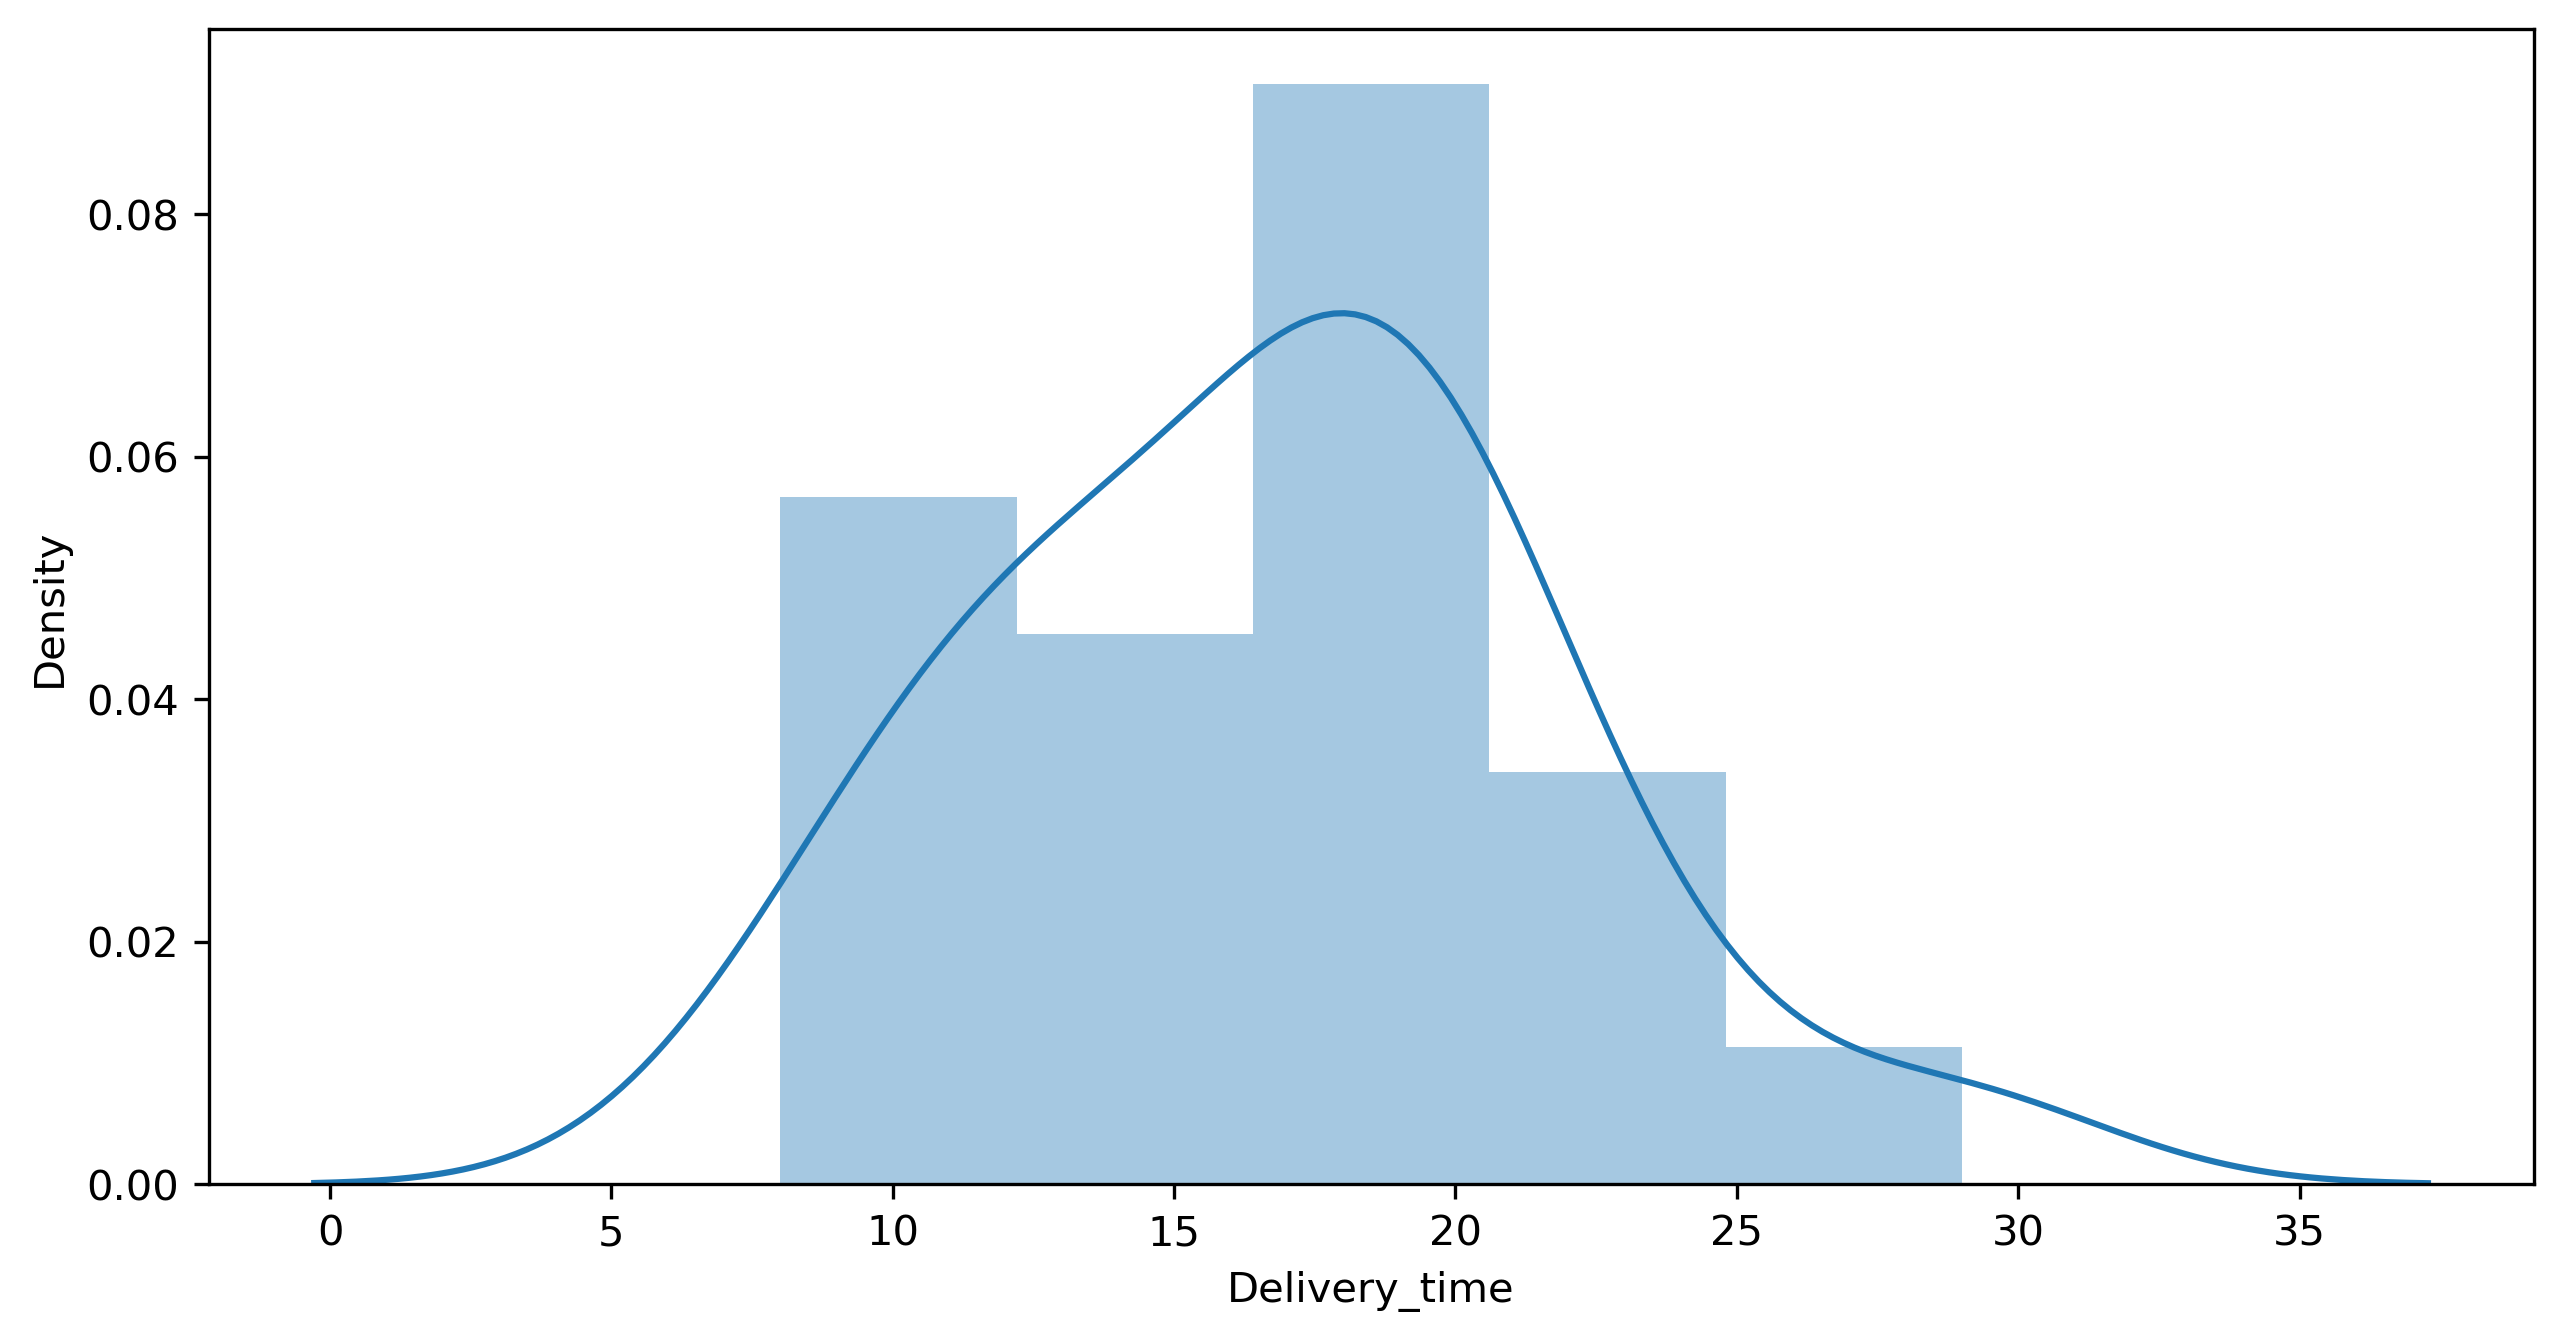

In [10]:
#Data Distribution

sns.distplot(df['Delivery_time'])


<AxesSubplot:xlabel='Sorting_time', ylabel='Density'>

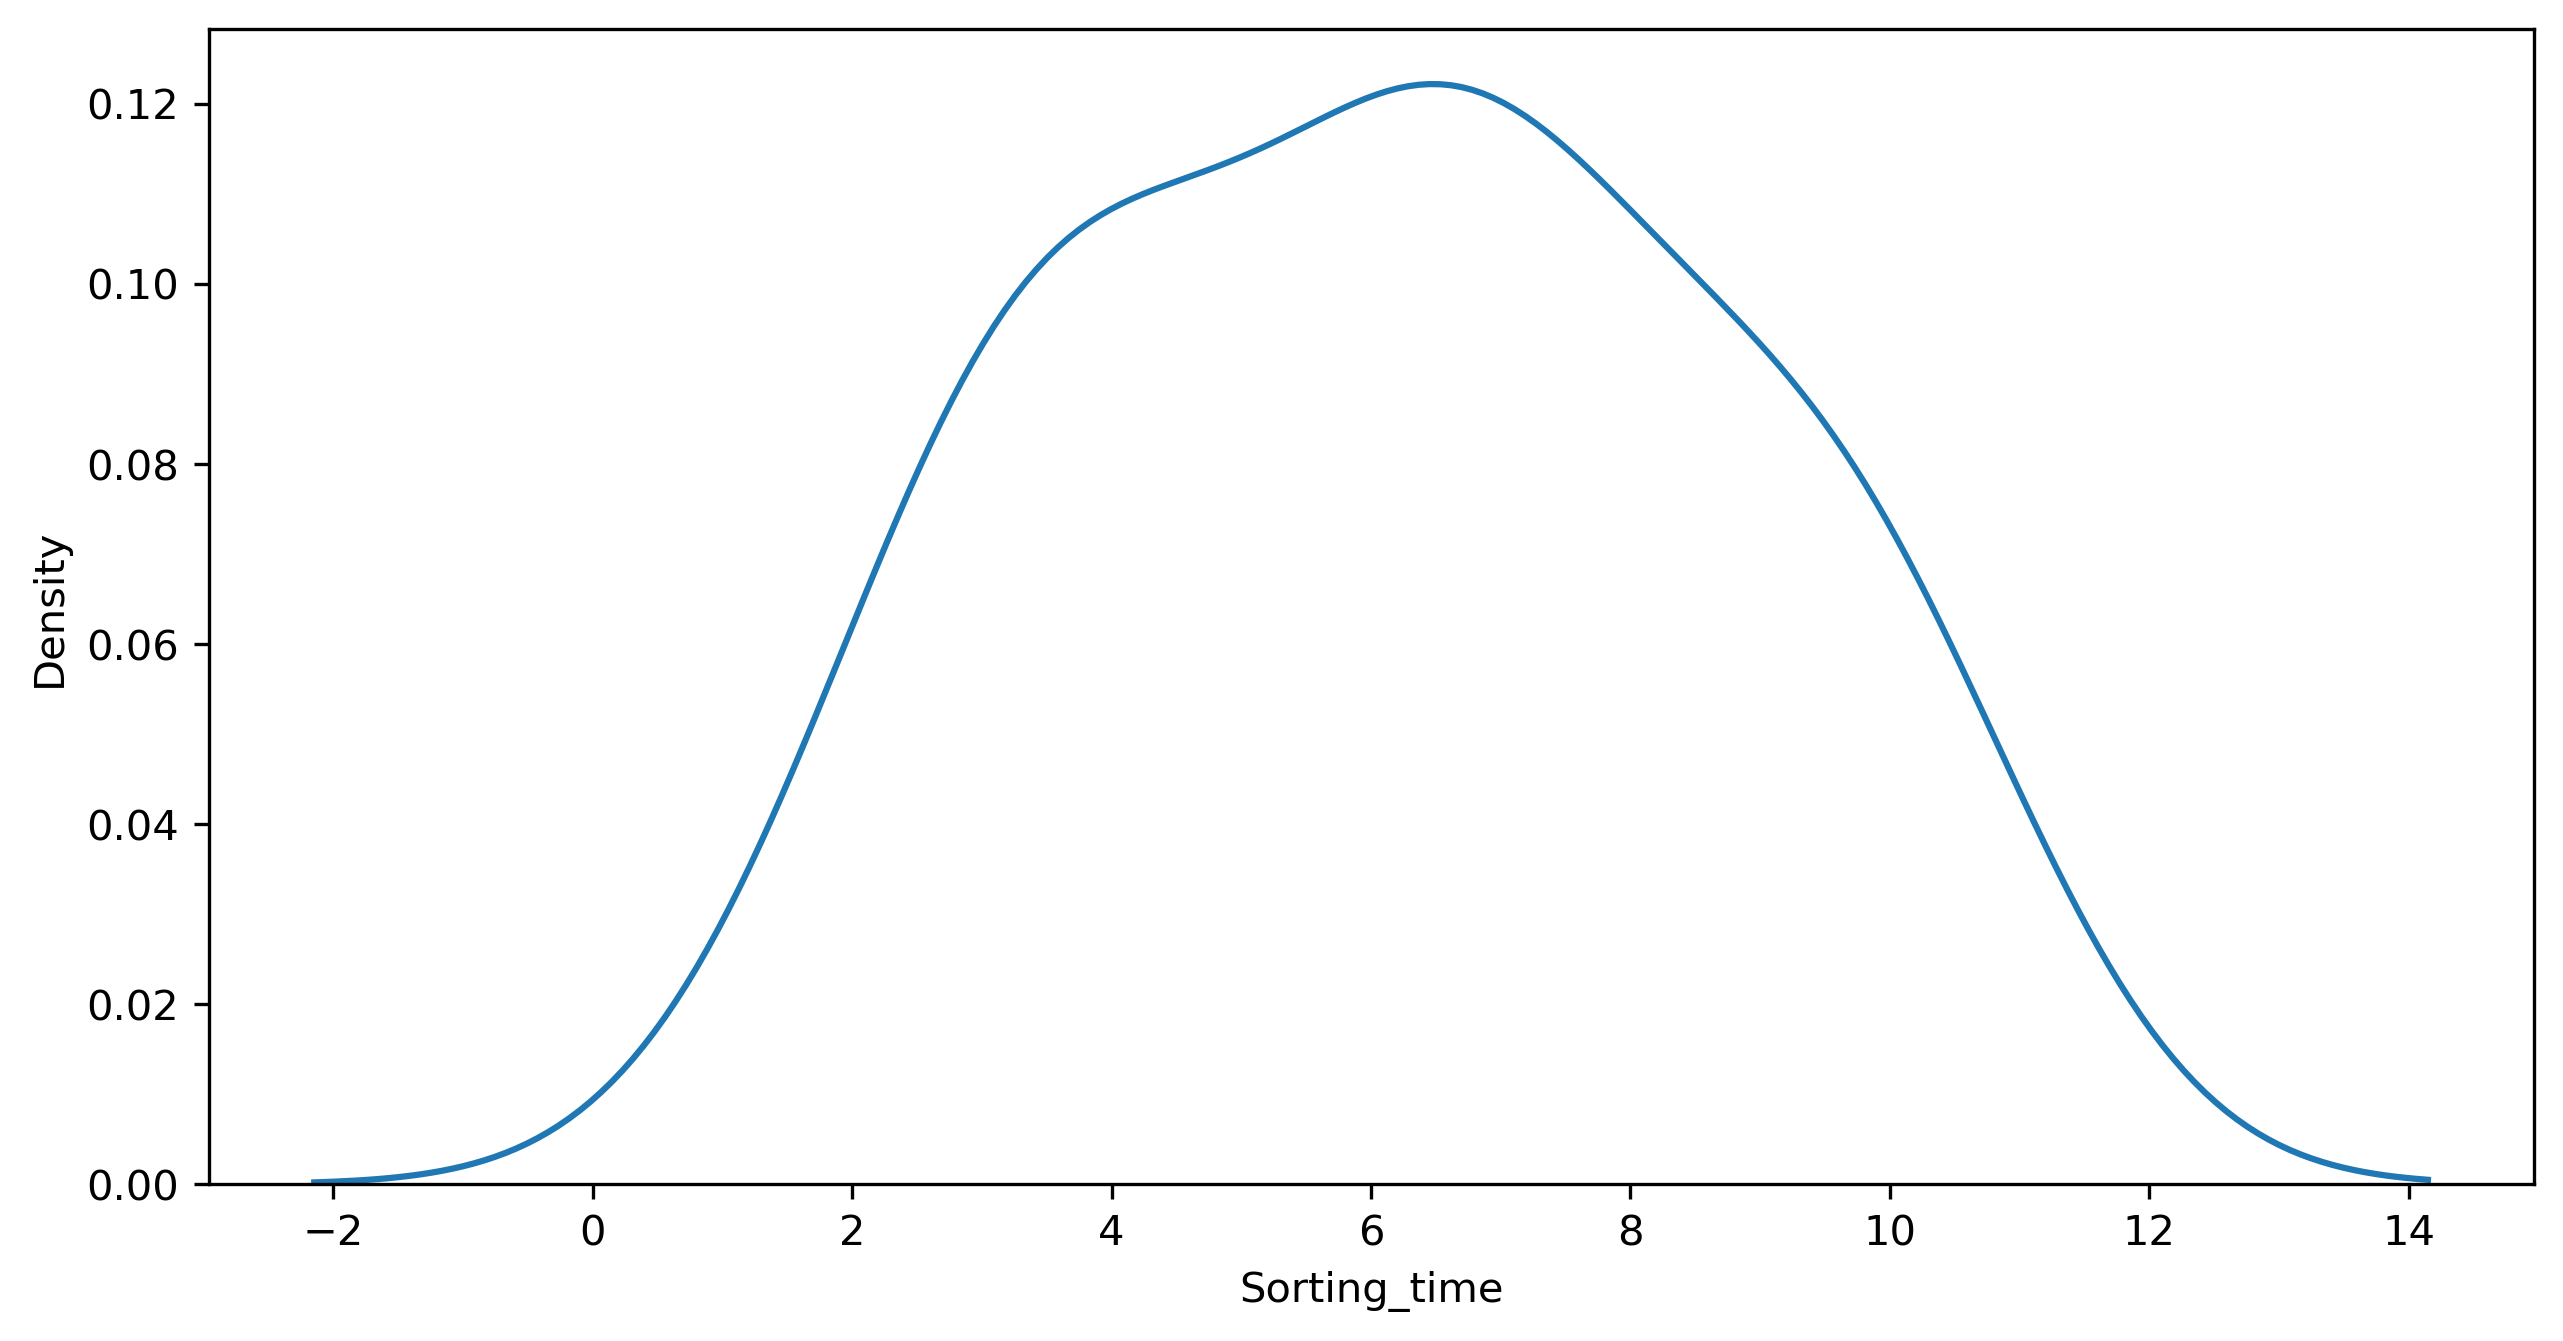

In [11]:
sns.kdeplot(df['Sorting_time'])

<AxesSubplot:xlabel='Delivery_time', ylabel='Sorting_time'>

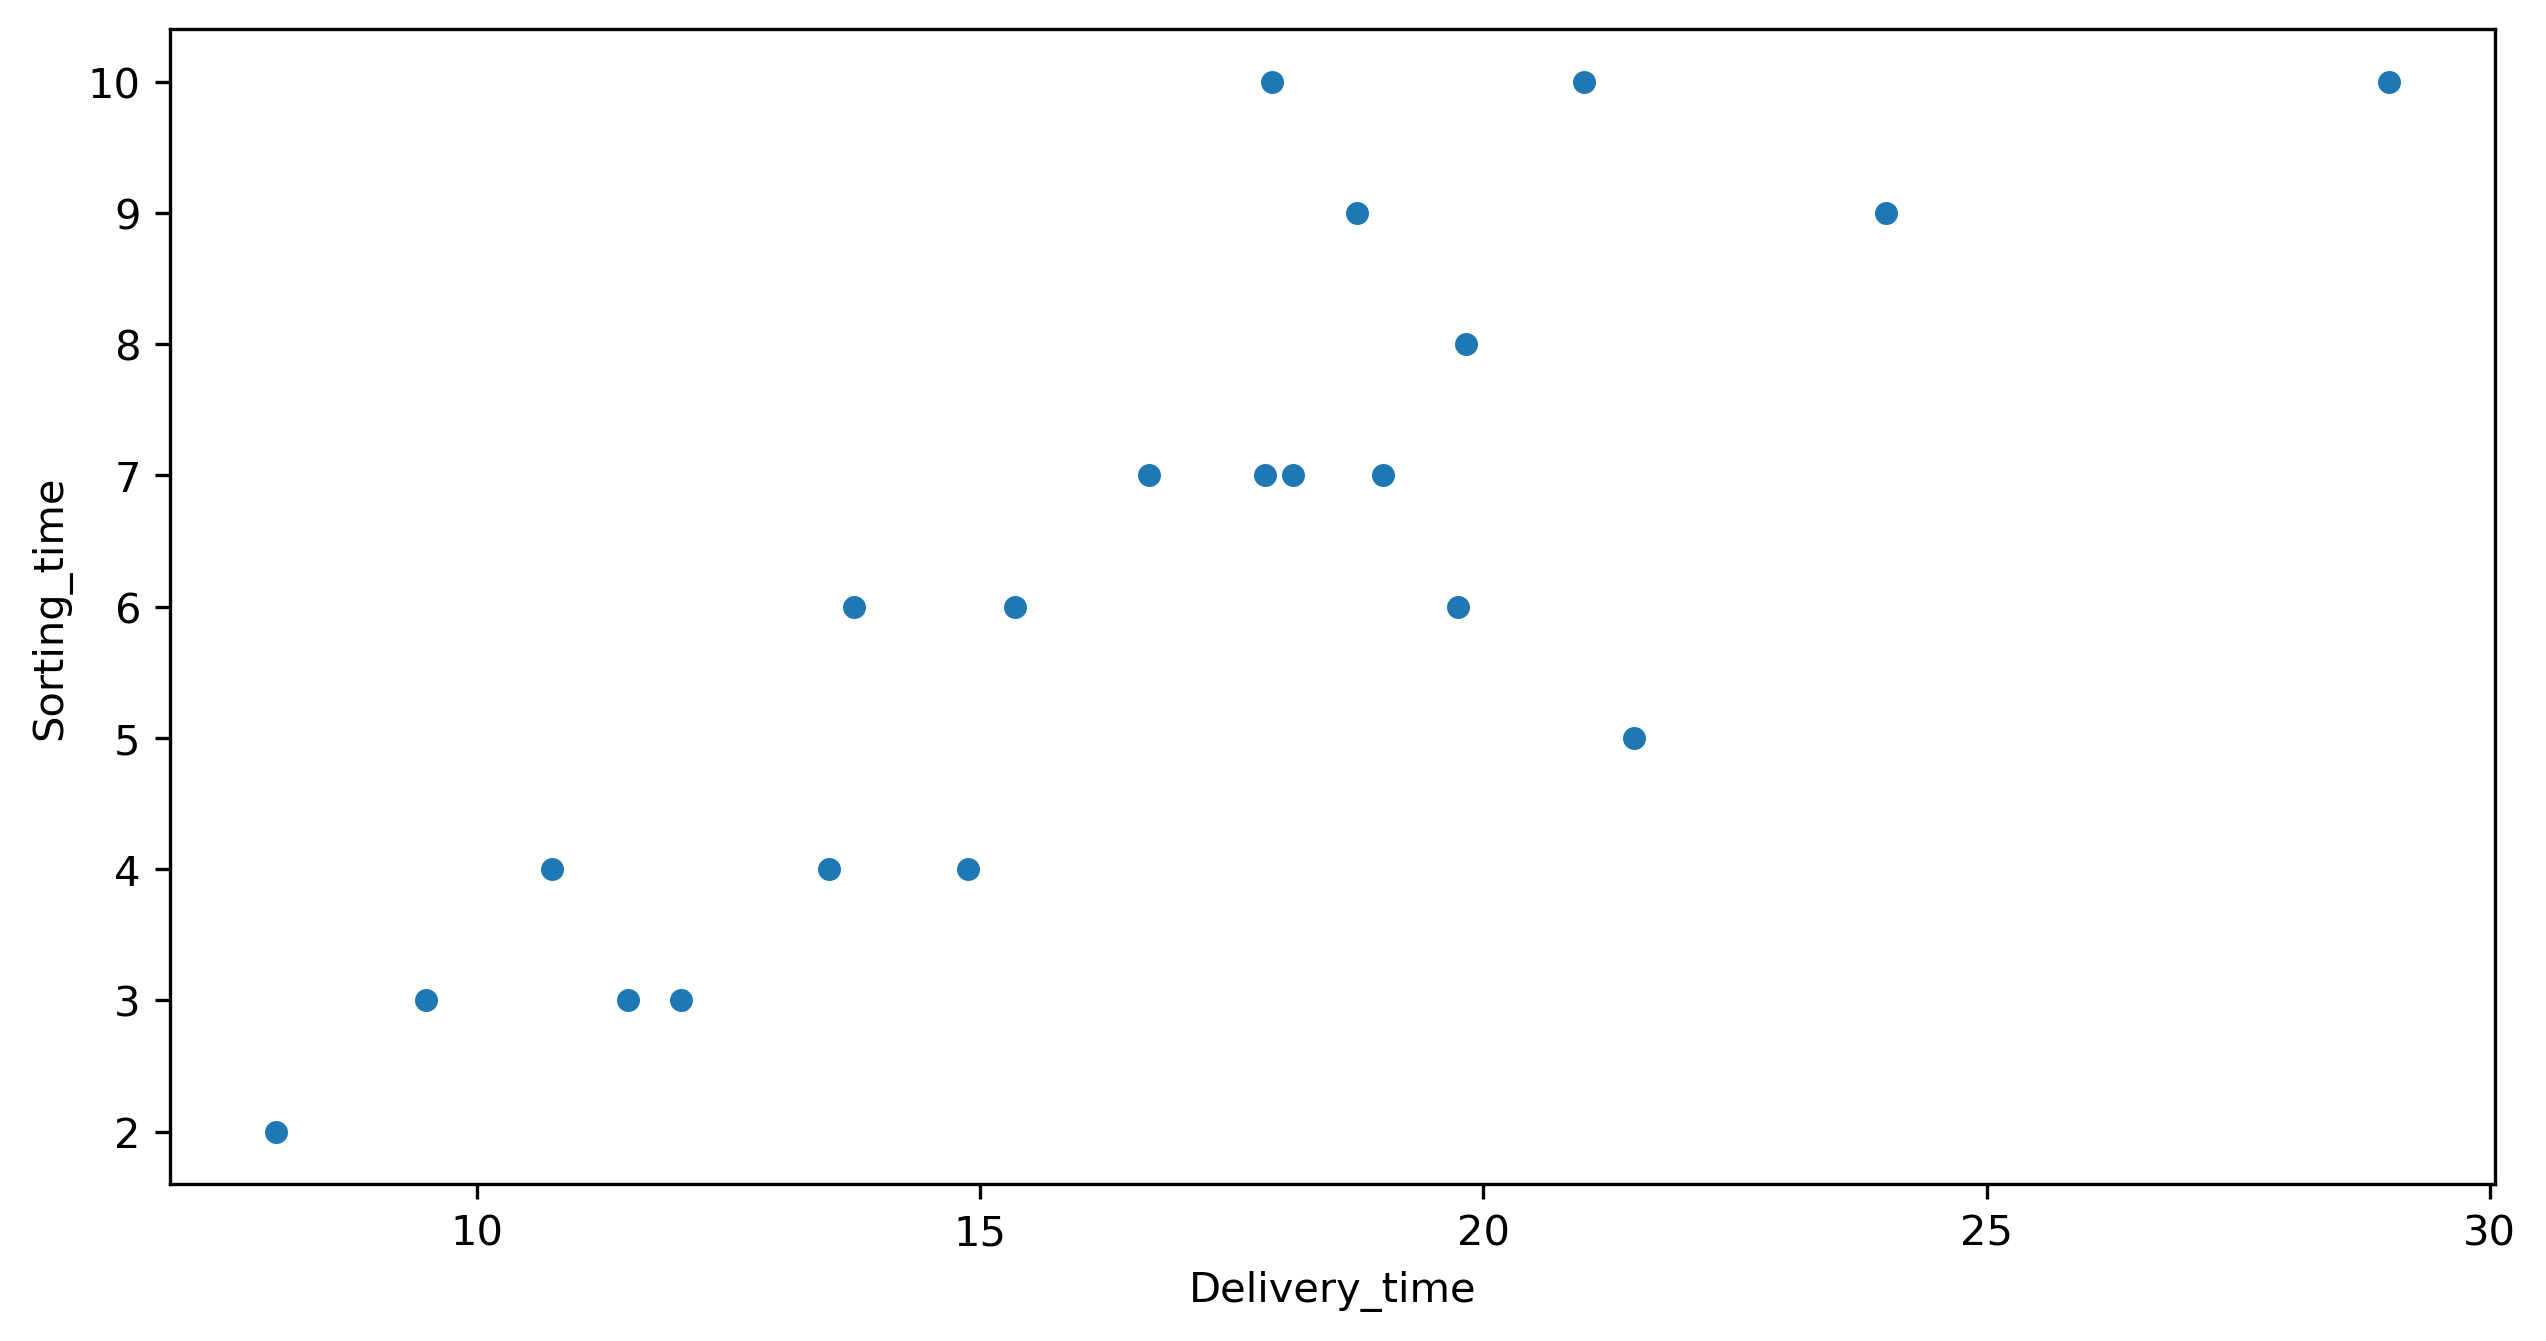

In [12]:
#corelation analysis

sns.scatterplot(df['Delivery_time'],df['Sorting_time'])

In [13]:
df.corr()

,Delivery_time,Sorting_time
Delivery_time,1.000000,0.825997
Sorting_time,0.825997,1.000000


<AxesSubplot:>

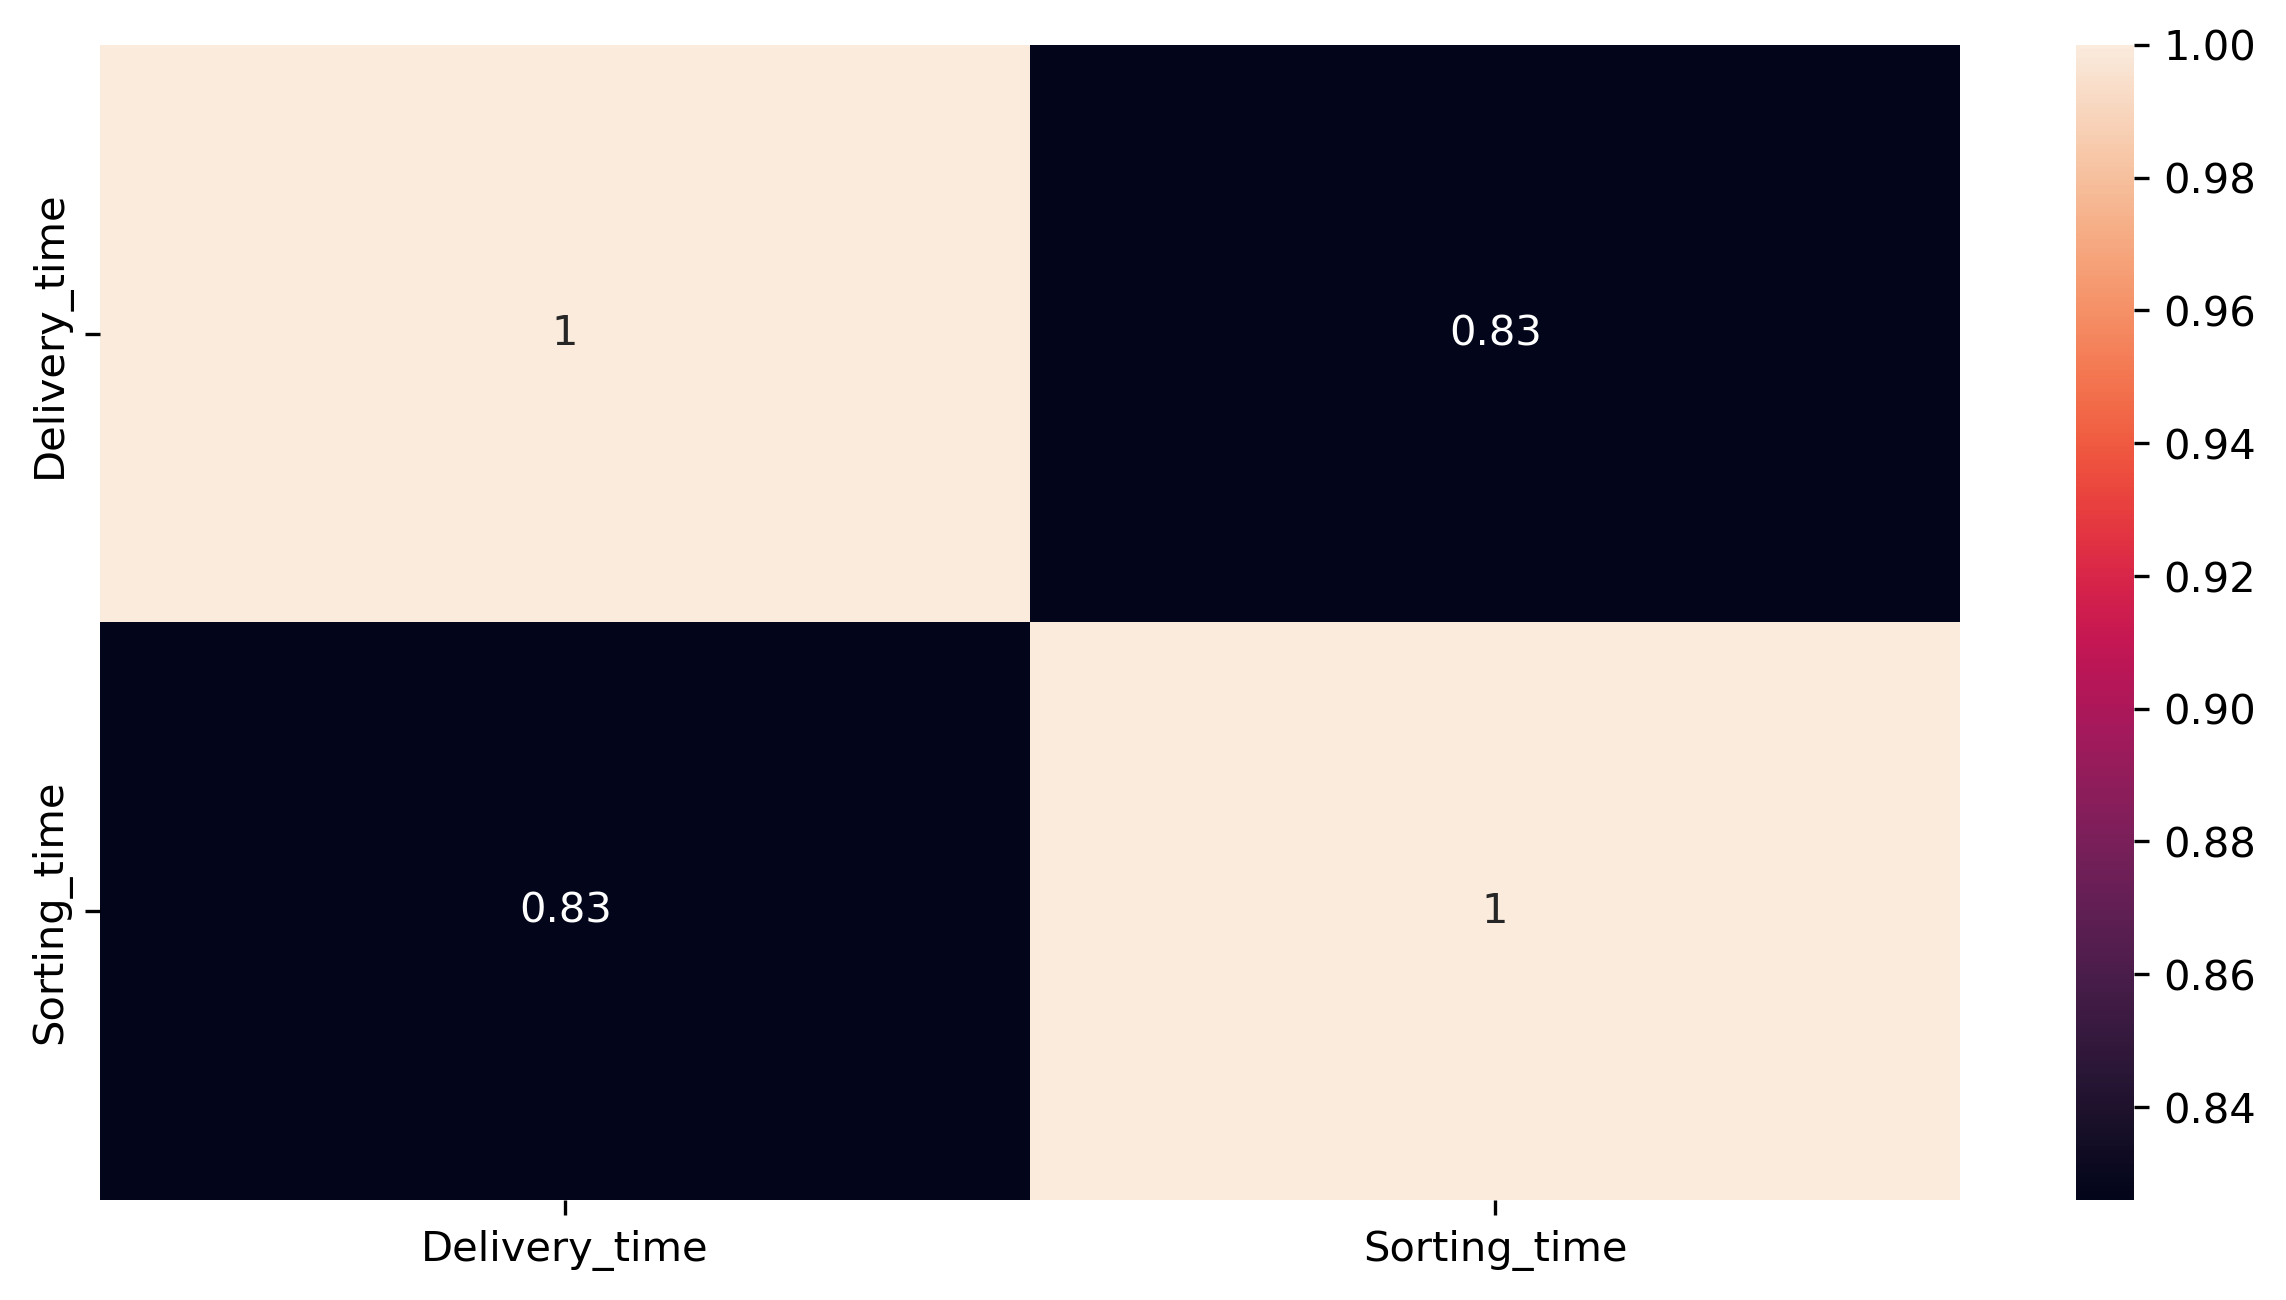

In [14]:
sns.heatmap(df.corr(),annot=True)

In [15]:
#import Statsmodel

import statsmodels.formula.api as slr

In [16]:
model=slr.ols('Delivery_time~Sorting_time', data= df).fit()

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 07 Mar 2023   Prob (F-statistic):           3.98e-06
Time:                        19:46:13   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
model.params

Intercept       6.582734
Sorting_time    1.649020
dtype: float64

In [19]:
# print the value for t value and p value

print(f"t value is \n{model.tvalues}\n p value is \n {model.pvalues}")

t value is 
Intercept       3.823349
Sorting_time    6.387447
dtype: float64
 p value is 
 Intercept       0.001147
Sorting_time    0.000004
dtype: float64


In [20]:
#r^2 value

In [21]:
 model.rsquared ,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

Model Prediction

In [22]:
d=[7,8]
pred=pd.DataFrame(d,columns=['Sorting_time'])
pred

,Sorting_time
0,7
1,8


In [23]:
model.predict(pred)

0    18.125873
1    19.774893
dtype: float64

#Log Transformation

In [24]:
model=slr.ols('Delivery_time~np.log(Sorting_time)',data=df).fit()

In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Tue, 07 Mar 2023   Prob (F-statistic):           2.64e-06
Time:                        19:46:14   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(Sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
model.params

Intercept               1.159684
np.log(Sorting_time)    9.043413
dtype: float64

In [27]:
print(f"t value is \n{model.tvalues}\nP values is \n{model.pvalues}")

t value is 
Intercept               0.472460
np.log(Sorting_time)    6.586789
dtype: float64
P values is 
Intercept               0.641980
np.log(Sorting_time)    0.000003
dtype: float64


In [28]:
#r^2 Values

model.rsquared,model.rsquared_adj

(0.6954434611324223, 0.6794141696130761)


Model prediction


In [29]:
model.predict(pred)

0    18.757354
1    19.964933
dtype: float64

In [30]:
#Exponential Transformation

In [31]:
model2=slr.ols('np.log(Delivery_time)~Sorting_time',data=df).fit()

In [32]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Tue, 07 Mar 2023   Prob (F-statistic):           1.59e-06
Time:                           19:46:16   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
Sorting_time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
model2.params

Intercept       2.121372
Sorting_time    0.105552
dtype: float64

In [34]:
print(f"t value is\n{model2.tvalues}\nP value is\n {model2.pvalues}")

t value is
Intercept       20.601357
Sorting_time     6.836088
dtype: float64
P value is
 Intercept       1.857343e-14
Sorting_time    1.592708e-06
dtype: float64


#r^2 values

In [35]:
model2.rsquared,model2.rsquared_adj

(0.7109478980584187, 0.6957346295351776)

MODEL PREDICTION



In [36]:
model2.predict(pred)

0    2.860233
1    2.965785
dtype: float64

Quadratic Model

In [37]:
df['Sorting_time_sq']= df.Sorting_time*df.Sorting_time

In [38]:
model3= slr.ols('Delivery_time~Sorting_time+Sorting_time_sq', data=df).fit()

In [39]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_time   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     20.36
Date:                Tue, 07 Mar 2023   Prob (F-statistic):           2.39e-05
Time:                        19:46:17   Log-Likelihood:                -50.981
No. Observations:                  21   AIC:                             108.0
Df Residuals:                      18   BIC:                             111.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.5222      4.160      0.847      0.408      -5.217      12.261
Sorting_time        2.8130      1.461      1.926      0.070      -0.256       5.882
Sorting_time_sq    -0.0932      0.115     -0.810      0.429      -0.335       0.149
==============================================================================
Omnibus:                        5.388   Durbin-Watson:                   1.345
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                3.393
Skew:                           0.943   Prob(JB):                        0.183
Kurtosis:                       3.563   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
model3.params

Intercept          3.522234
Sorting_time       2.813002
Sorting_time_sq   -0.093198
dtype: float64

In [41]:
print(f"t value is\n{model3.tvalues}\nP value is\n {model3.pvalues}")

t value is
Intercept          0.846756
Sorting_time       1.925632
Sorting_time_sq   -0.809783
dtype: float64
P value is
 Intercept          0.408248
Sorting_time       0.070097
Sorting_time_sq    0.428641
dtype: float64


In [42]:
#r^2 value

model3.rsquared,model3.rsquared_adj

(0.6934396274520248, 0.6593773638355831)

# Model Prediction

# problem statement 2 

# 2) Salary_hike -> Build a prediction model for Salary_hike
    

In [43]:
df1= pd.read_csv("Salary_Data.csv")
df1.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# EDA

In [44]:
df1.shape

(30, 2)

In [45]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [52]:
df1.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [53]:
df1.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

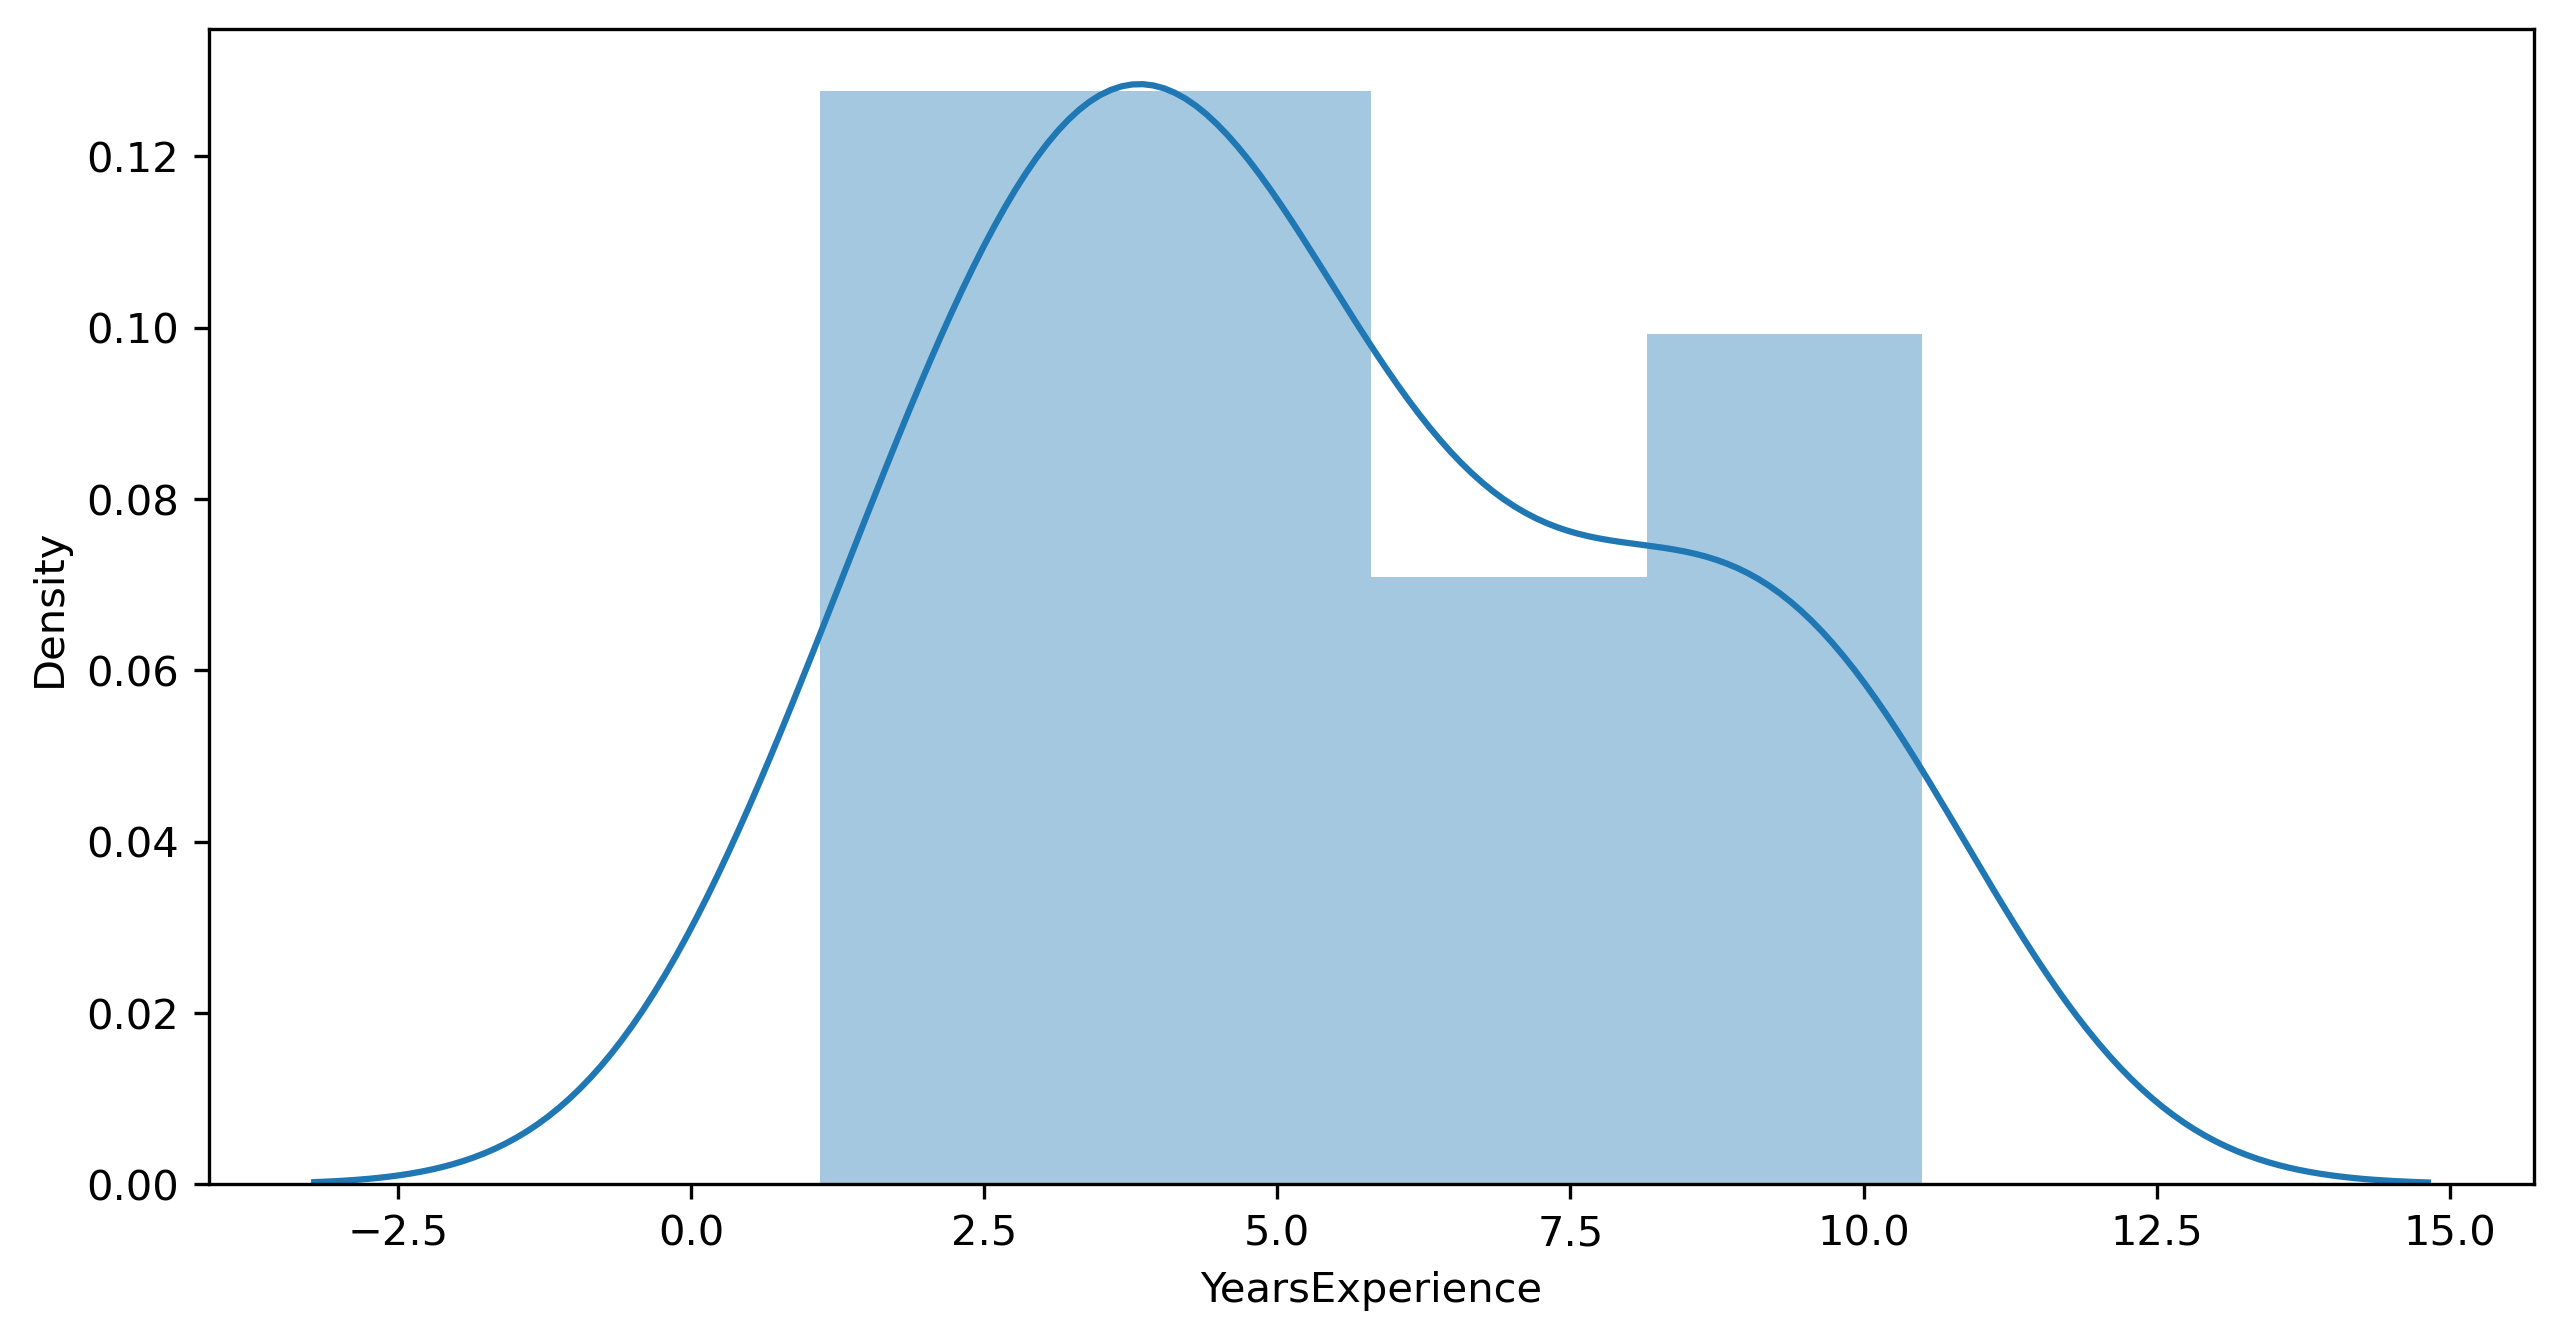

In [55]:
sns.distplot(df1['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

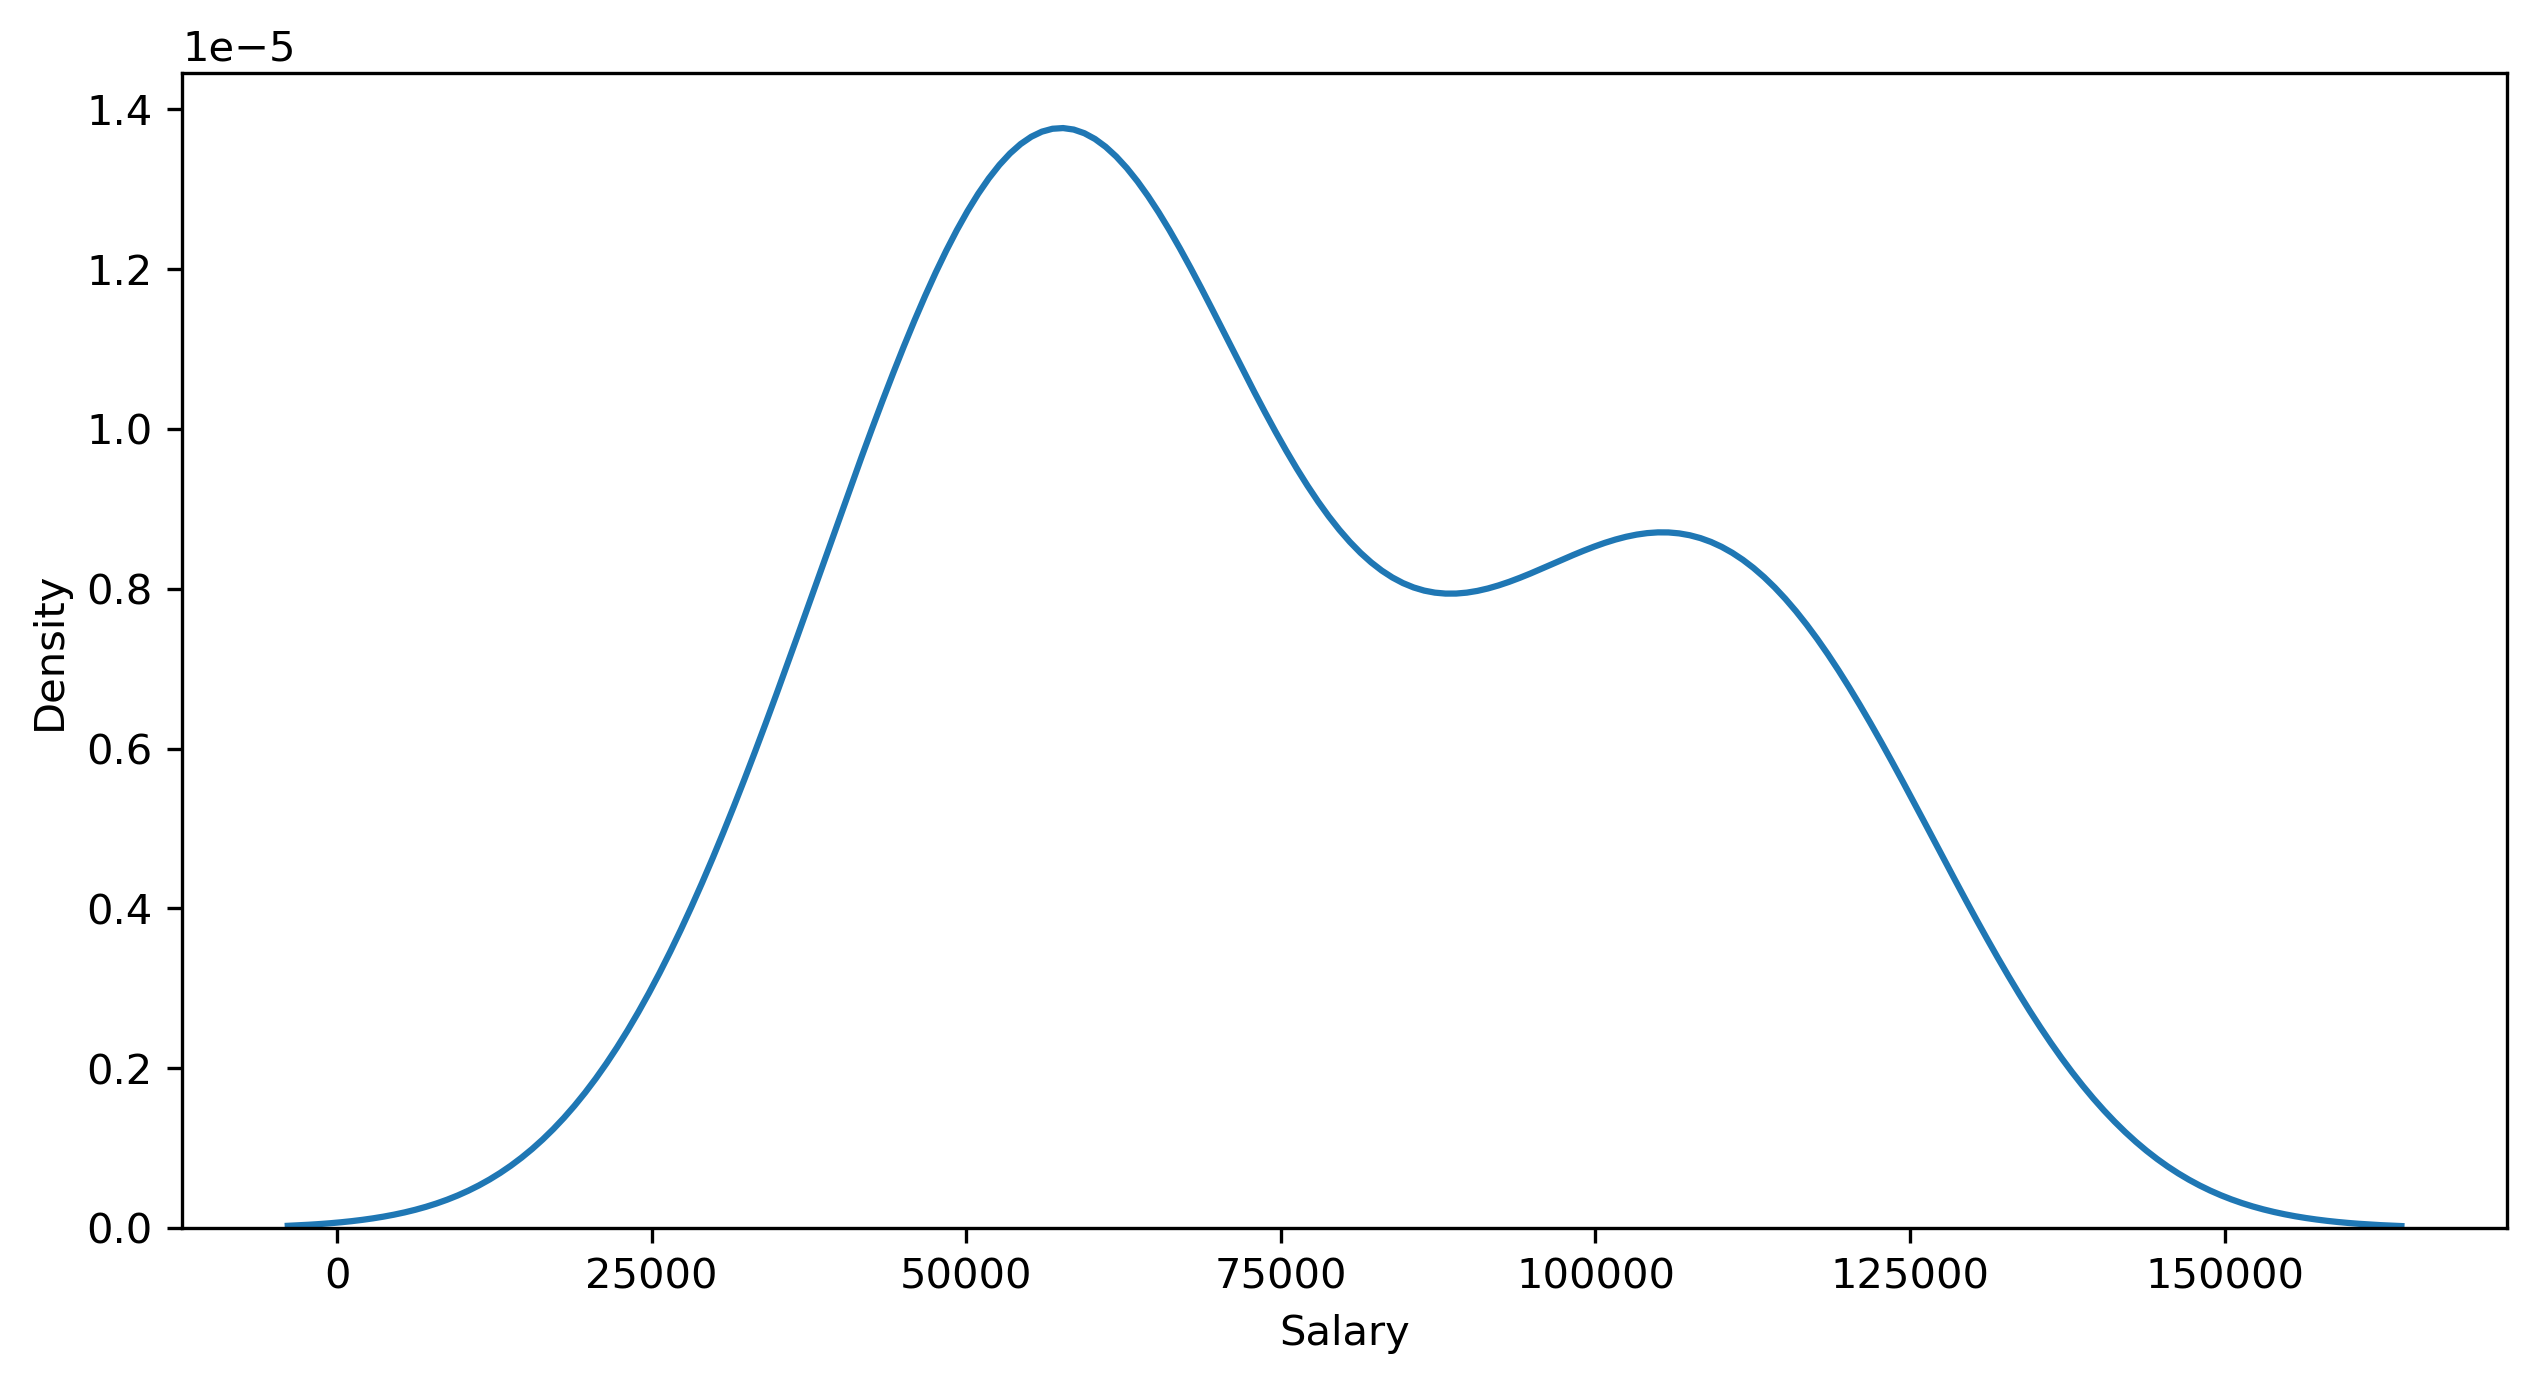

In [56]:
sns.kdeplot(df1['Salary'])

#correlation Analysis

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

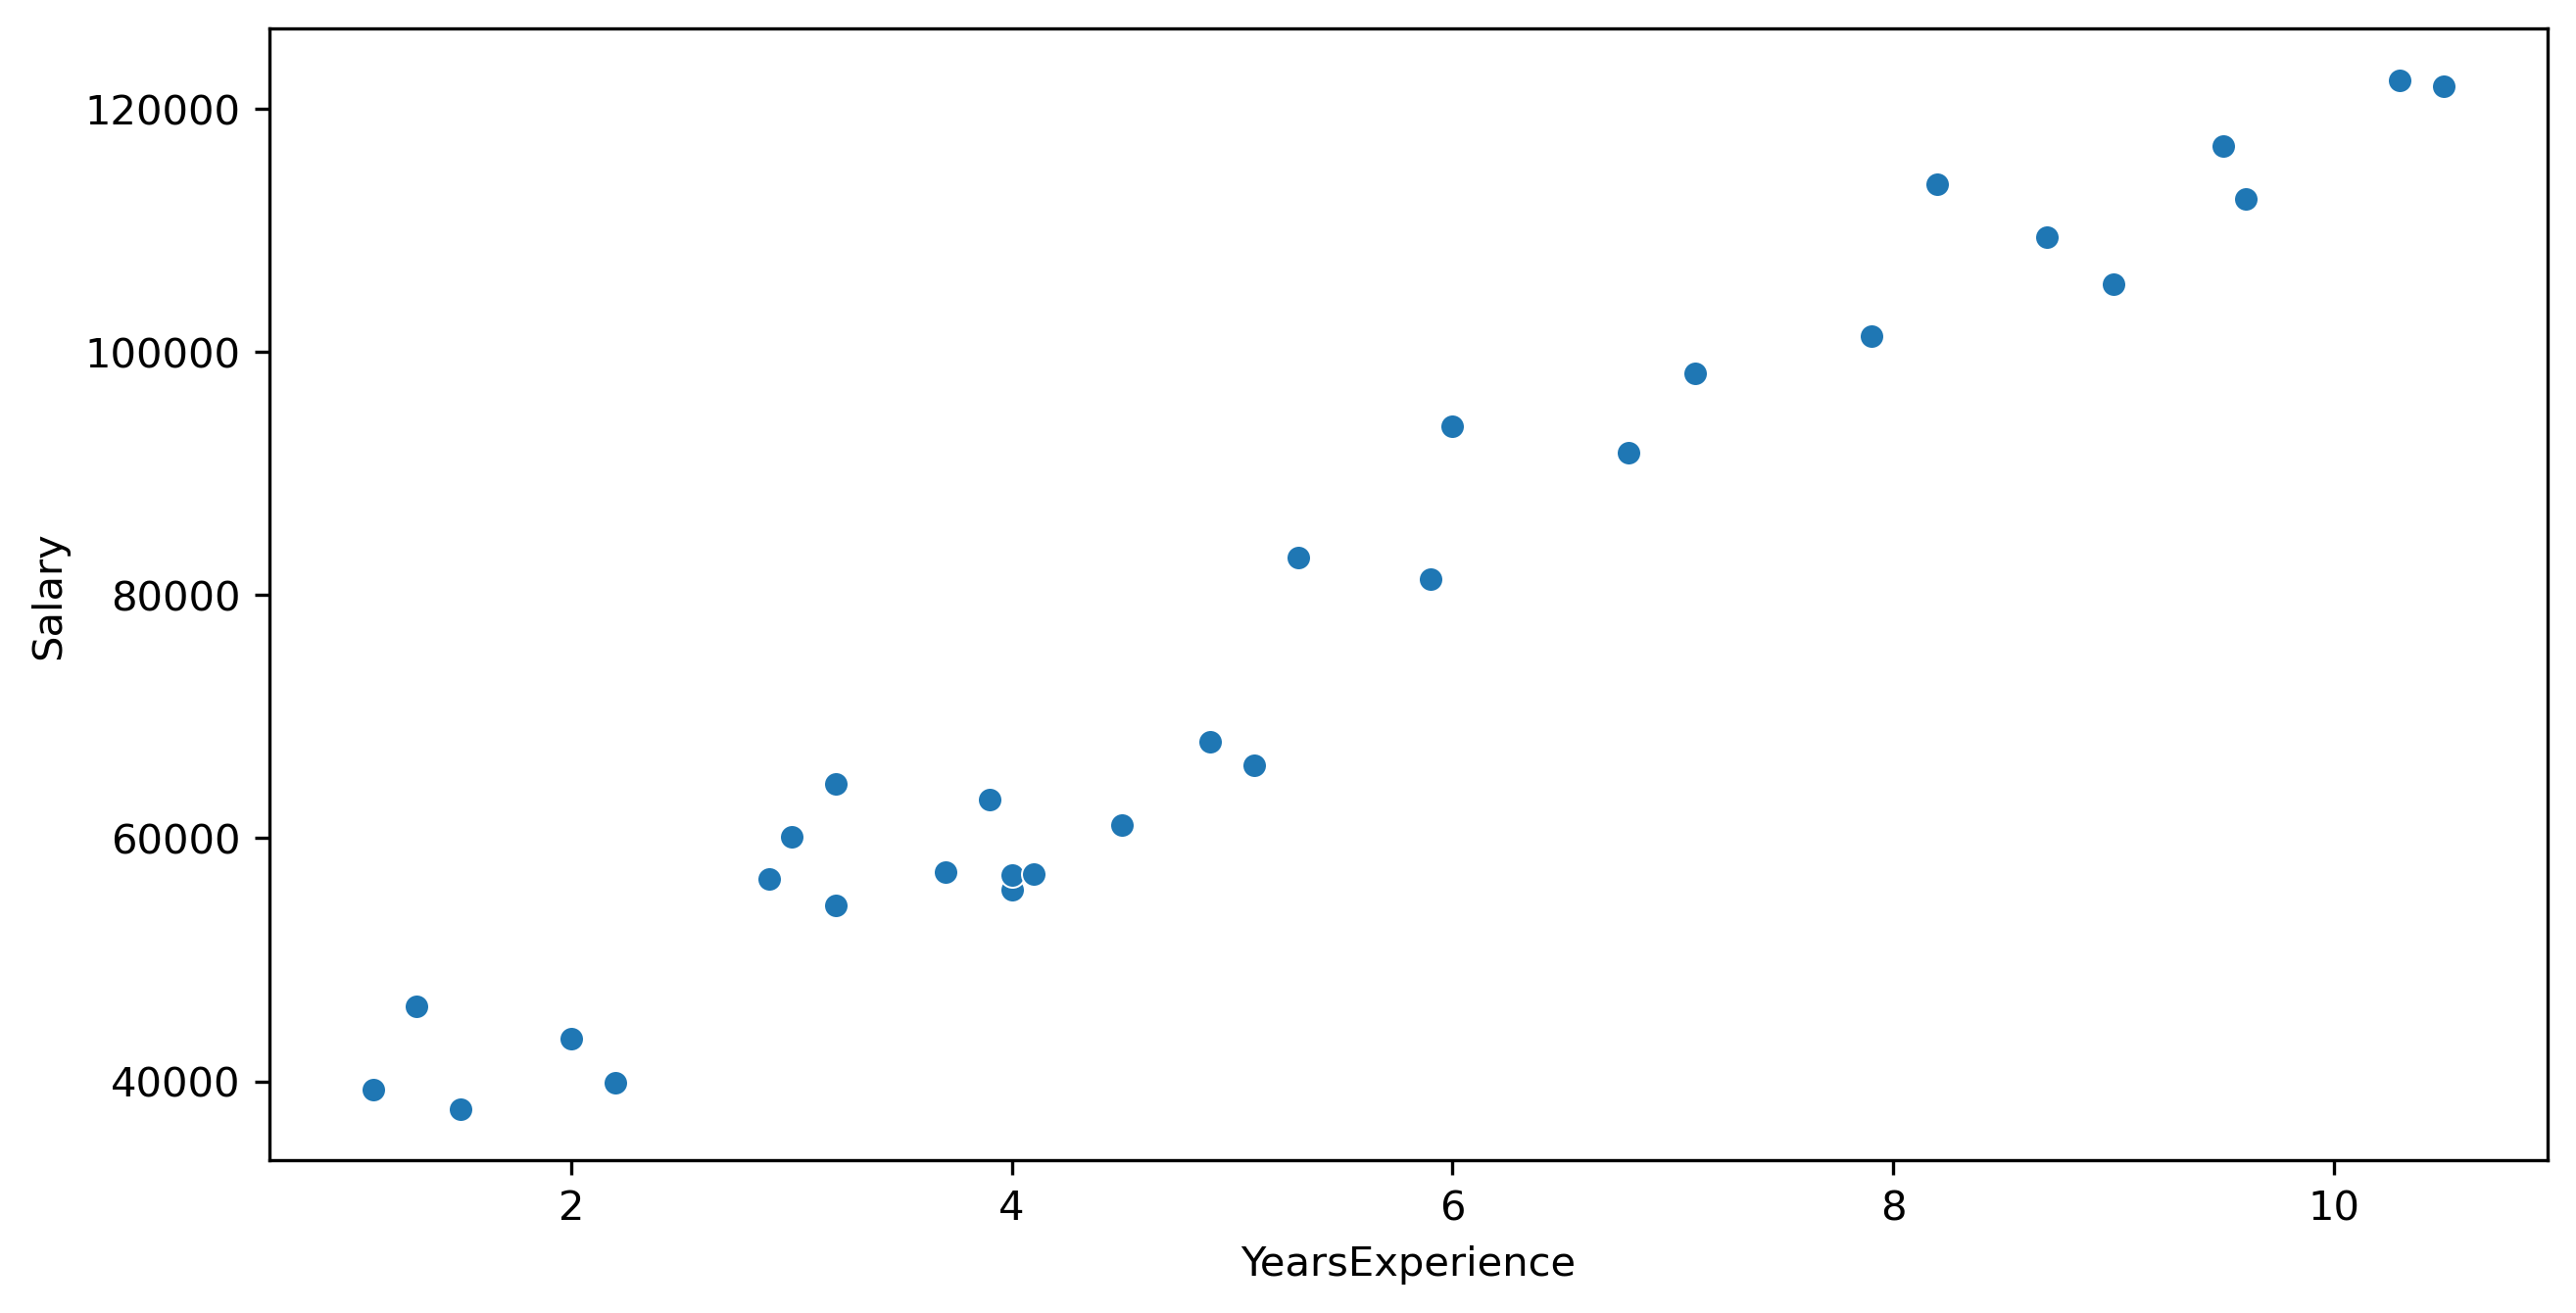

In [58]:
sns.scatterplot(df1['YearsExperience'],df1['Salary'])

In [59]:
df1.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:>

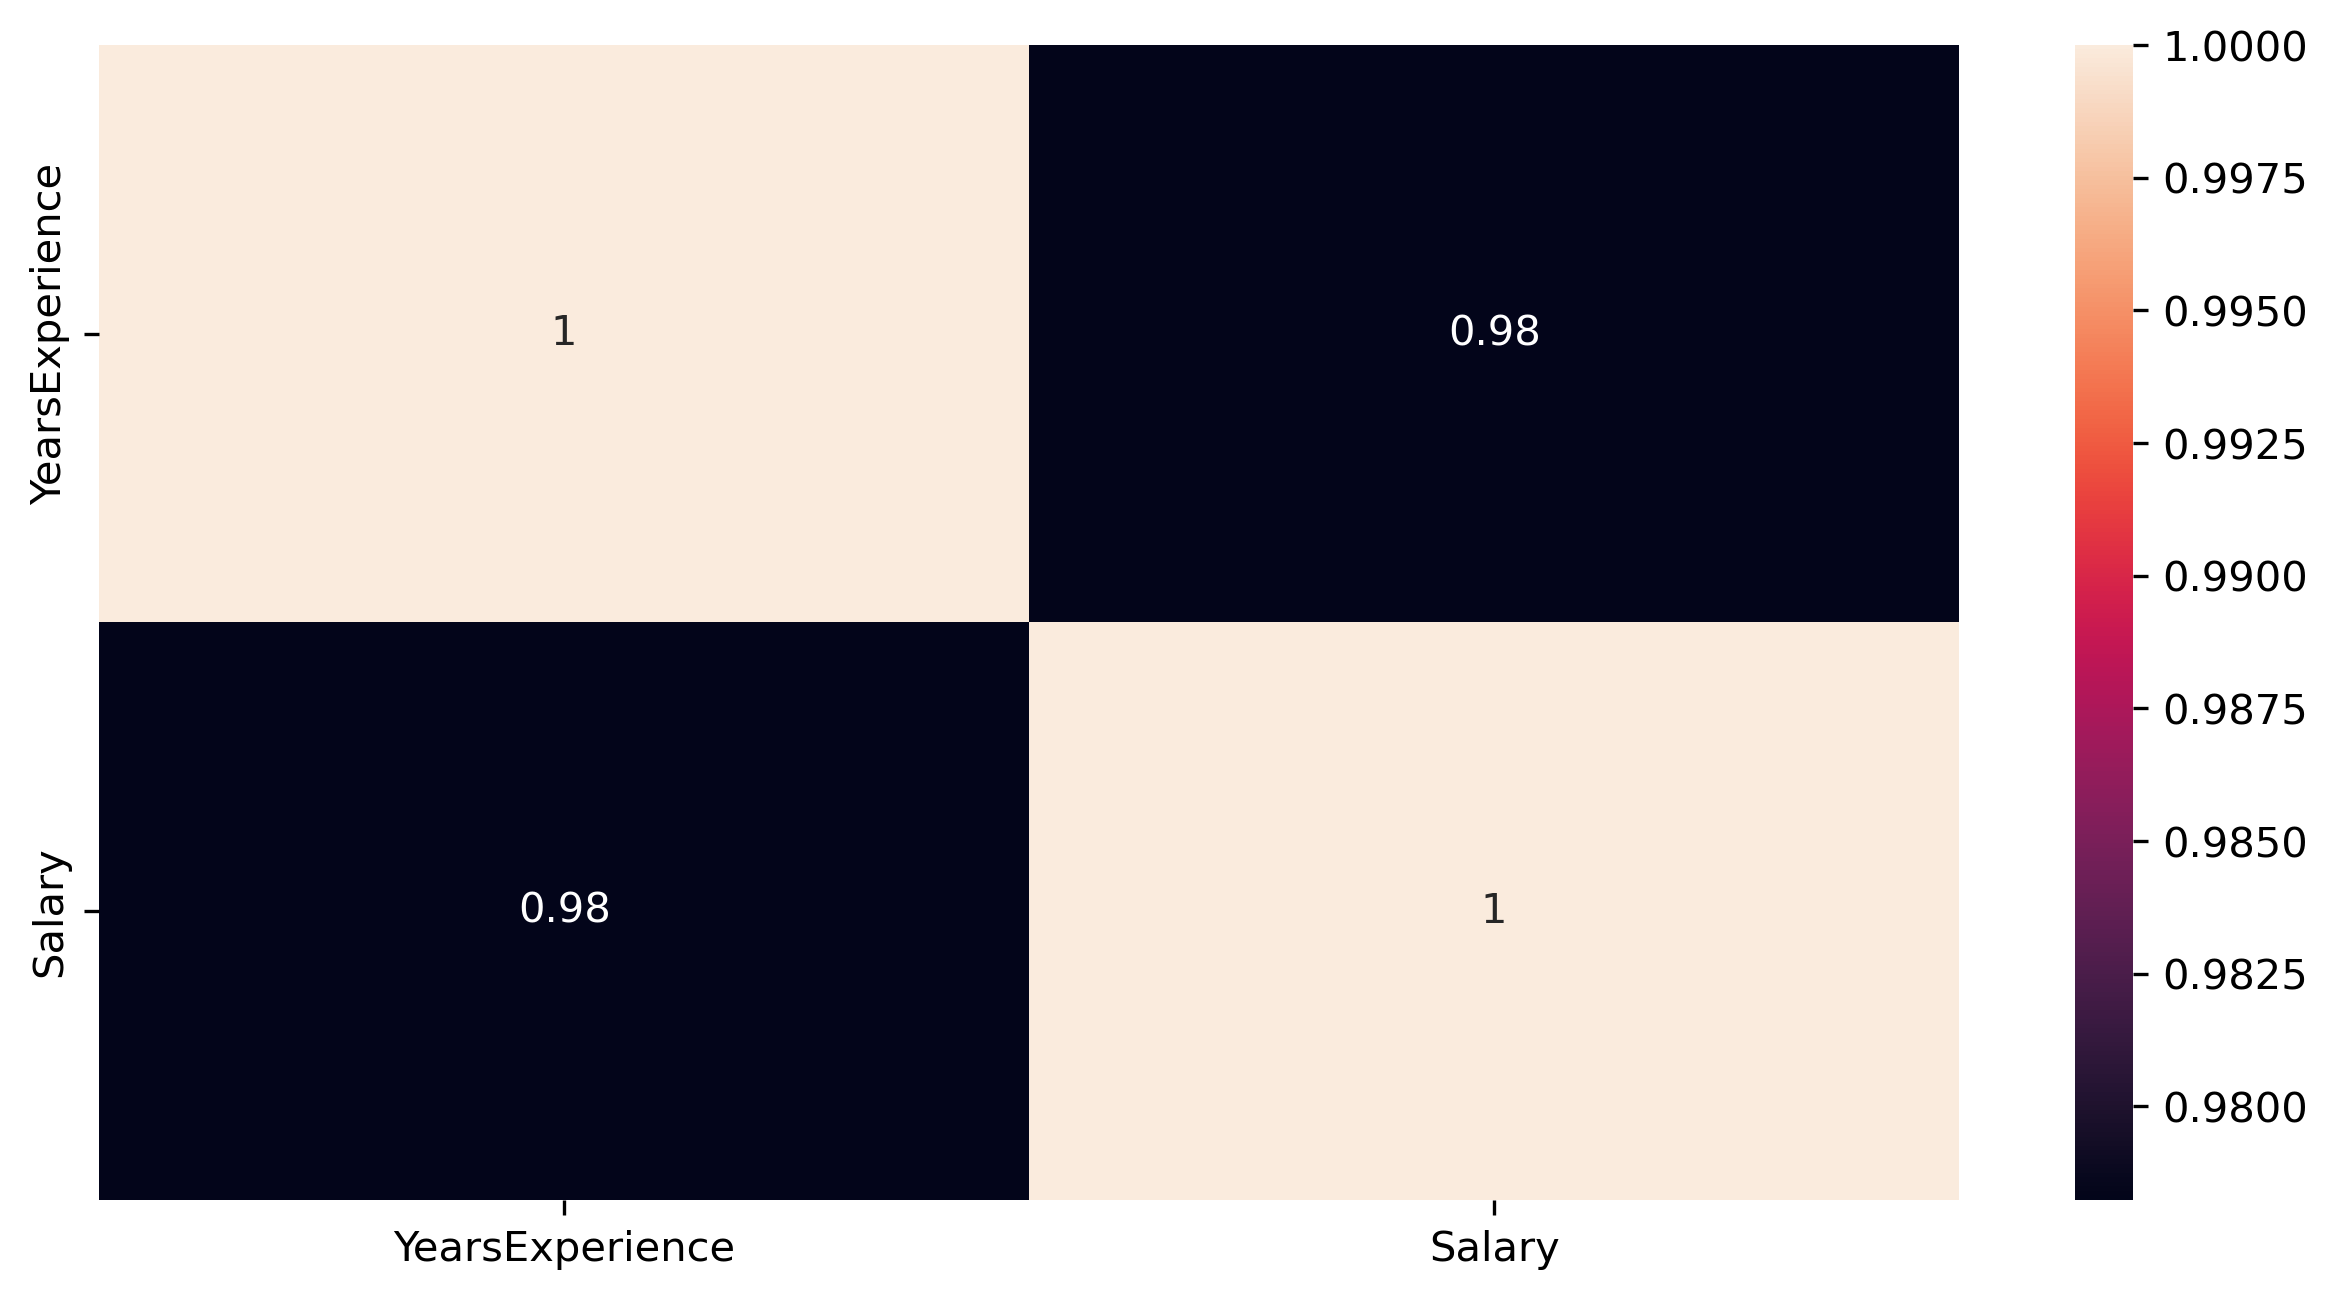

In [60]:
sns.heatmap(df1.corr(),annot=True)

#model building

In [62]:
m=slr.ols('Salary~YearsExperience',data=df1).fit()

In [63]:
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 07 Mar 2023   Prob (F-statistic):           1.14e-20
Time:                        19:55:47   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
m.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [65]:
print(f"t value is\n{m.tvalues}\nP values is \n{m.pvalues}")

t value is
Intercept          11.346940
YearsExperience    24.950094
dtype: float64
P values is 
Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [66]:
#r^2 value

m.rsquared,m.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [69]:
new=[6,7]
pred=pd.DataFrame(new,columns=['YearsExperience'])
pred

,YearsExperience
0,6
1,7


In [70]:
m.predict(pred)

0    82491.974127
1    91941.936449
dtype: float64

#Log Transformation

In [73]:
m2= slr.ols('Salary~np.log(YearsExperience)', data=df1).fit()

In [74]:
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Tue, 07 Mar 2023   Prob (F-statistic):           3.25e-13
Time:                        20:02:19   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
m2.params

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64

In [76]:
print(f"t value is\n{m2.tvalues}\nP value is\n {m2.pvalues}")

t value is
Intercept                   2.895135
np.log(YearsExperience)    12.791989
dtype: float64
P value is
 Intercept                  7.268813e-03
np.log(YearsExperience)    3.250155e-13
dtype: float64


In [77]:
#r^2 value

m2.rsquared, m2.rsquared_adj

(0.853888882875697, 0.8486706286926862)

# Model Prediction

In [78]:
m2.predict(pred)

0    87641.132977
1    93896.874010
dtype: float64

# Exponential Transformation

In [80]:
m3= slr.ols('np.log(Salary)~YearsExperience', data=df1).fit()

In [81]:
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Tue, 07 Mar 2023   Prob (F-statistic):           7.03e-18
Time:                        20:05:04   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
#model parameters

m3.params

Intercept          10.507402
YearsExperience     0.125453
dtype: float64

In [83]:
#Print values for t value and p value

print(f"t value is\n{m3.tvalues}\nP value is\n {m3.pvalues}")

t value is
Intercept          273.327166
YearsExperience     19.584833
dtype: float64
P value is
 Intercept          1.604634e-49
YearsExperience    7.027439e-18
dtype: float64


In [84]:
#r^2 value

m3.rsquared, m3.rsquared_adj

(0.9319671194084194, 0.9295373736730057)

# model prediction

In [86]:
m3.predict(pred)

0    11.260119
1    11.385572
dtype: float64

# Quadratic Model

In [88]:
df1['YearsExperience_sq']= df1.YearsExperience*df1.YearsExperience

In [90]:
m4= slr.ols('Salary~YearsExperience+YearsExperience_sq', data=df1).fit()

In [91]:
m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     300.3
Date:                Tue, 07 Mar 2023   Prob (F-statistic):           3.59e-19
Time:                        20:08:01   Log-Likelihood:                -301.43
No. Observations:                  30   AIC:                             608.9
Df Residuals:                      27   BIC:                             613.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2.621e+04   4554.674      5.756      0.000    1.69e+04    3.56e+04
YearsExperience     9259.2839   1811.007      5.113      0.000    5543.405     1.3e+04
YearsExperience_sq    16.3926    152.121      0.108      0.915    -295.734     328.520
==============================================================================
Omnibus:                        2.181   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.336   Jarque-Bera (JB):                1.627
Skew:                           0.384   Prob(JB):                        0.443
Kurtosis:                       2.156   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
m4.params

Intercept             26214.932677
YearsExperience        9259.283888
YearsExperience_sq       16.392566
dtype: float64

In [93]:
#Print values for t value and p value

print(f"t value is\n{m4.tvalues}\nP value is\n {m4.pvalues}")

t value is
Intercept             5.755611
YearsExperience       5.112783
YearsExperience_sq    0.107760
dtype: float64
P value is
 Intercept             0.000004
YearsExperience       0.000022
YearsExperience_sq    0.914983
dtype: float64


In [94]:
#r^2 value

m4.rsquared, m4.rsquared_adj

(0.956975168321065, 0.953788143752255)